In [224]:
import matplotlib.pyplot as plt
import numpy as np

'''

Given some guess of the source of direction we can shift the carrier frequency
phase of received samples at the N different receivers. If the guess of the
source direction is correct, the signal from the N different receivers should
interfer constructively.

'''

c=3e8 # speed of light
import importlib
import rf
importlib.reload(rf)


<module 'rf' from '/Users/miskodzamba/Dropbox/research/gits/spf/software/model_training_and_inference/utils/rf.py'>

In [225]:
d=rf.ULADetector(sampling_frequency=1e6,n_elements=2,spacing=6)

In [233]:

importlib.reload(rf)

from scipy import signal
from numpy import convolve as np_convolve

sample_rate=11.2e6
channel_frequency=100e3
carrier_frequency=1.2e9


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)
    
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

x=100
y=10
qam=rf.QAMSource(np.array([x,y]),
               signal_frequency=channel_frequency,
               sigma=0,
               IQ=(0.1,1.0),
                h = signal.firwin(numtaps=151, cutoff=channel_frequency, fs=sample_rate)
              )
q=rf.CarrierSource(np.array([x,y]),
                   carrier_frequency,
                   qam,
                h = signal.firwin(numtaps=11, cutoff=channel_frequency, fs=sample_rate) #, width=0.01)
                  )


cut_off = channel_frequency # Hz

#t=np.linspace(0,20e-6,1000)
t=np.arange(0,3.0/channel_frequency,1.0/sample_rate).reshape(1,-1)

# create our low pass filter
qam_signal=qam.signal(t)
qam_signal_I=qam.lo_in_phase.signal(t)*qam.IQ[0]
qam_signal_Q=qam.lo_out_of_phase.signal(t)*qam.IQ[1]
emitted_signal=q.signal(t)

demod_s_nofil=q.demod_signal(emitted_signal,t,use_filter=False,nested=True)
demod_s_fil=q.demod_signal(emitted_signal,t,use_filter=True,nested=True)
#demod_s_fil=q.demod_signal(s,t,h=h)

car=q.carrier_source.signal(t).reshape(1,-1)


(1, 336)
[[0.00000000e+00 8.92857143e-08 1.78571429e-07 2.67857143e-07
  3.57142857e-07 4.46428571e-07 5.35714286e-07 6.25000000e-07
  7.14285714e-07 8.03571429e-07 8.92857143e-07 9.82142857e-07
  1.07142857e-06 1.16071429e-06 1.25000000e-06 1.33928571e-06
  1.42857143e-06 1.51785714e-06 1.60714286e-06 1.69642857e-06
  1.78571429e-06 1.87500000e-06 1.96428571e-06 2.05357143e-06
  2.14285714e-06 2.23214286e-06 2.32142857e-06 2.41071429e-06
  2.50000000e-06 2.58928571e-06 2.67857143e-06 2.76785714e-06
  2.85714286e-06 2.94642857e-06 3.03571429e-06 3.12500000e-06
  3.21428571e-06 3.30357143e-06 3.39285714e-06 3.48214286e-06
  3.57142857e-06 3.66071429e-06 3.75000000e-06 3.83928571e-06
  3.92857143e-06 4.01785714e-06 4.10714286e-06 4.19642857e-06
  4.28571429e-06 4.37500000e-06 4.46428571e-06 4.55357143e-06
  4.64285714e-06 4.73214286e-06 4.82142857e-06 4.91071429e-06
  5.00000000e-06 5.08928571e-06 5.17857143e-06 5.26785714e-06
  5.35714286e-06 5.44642857e-06 5.53571429e-06 5.62500000e-06

In [235]:
qam_signal_I.shape

(1, 336)

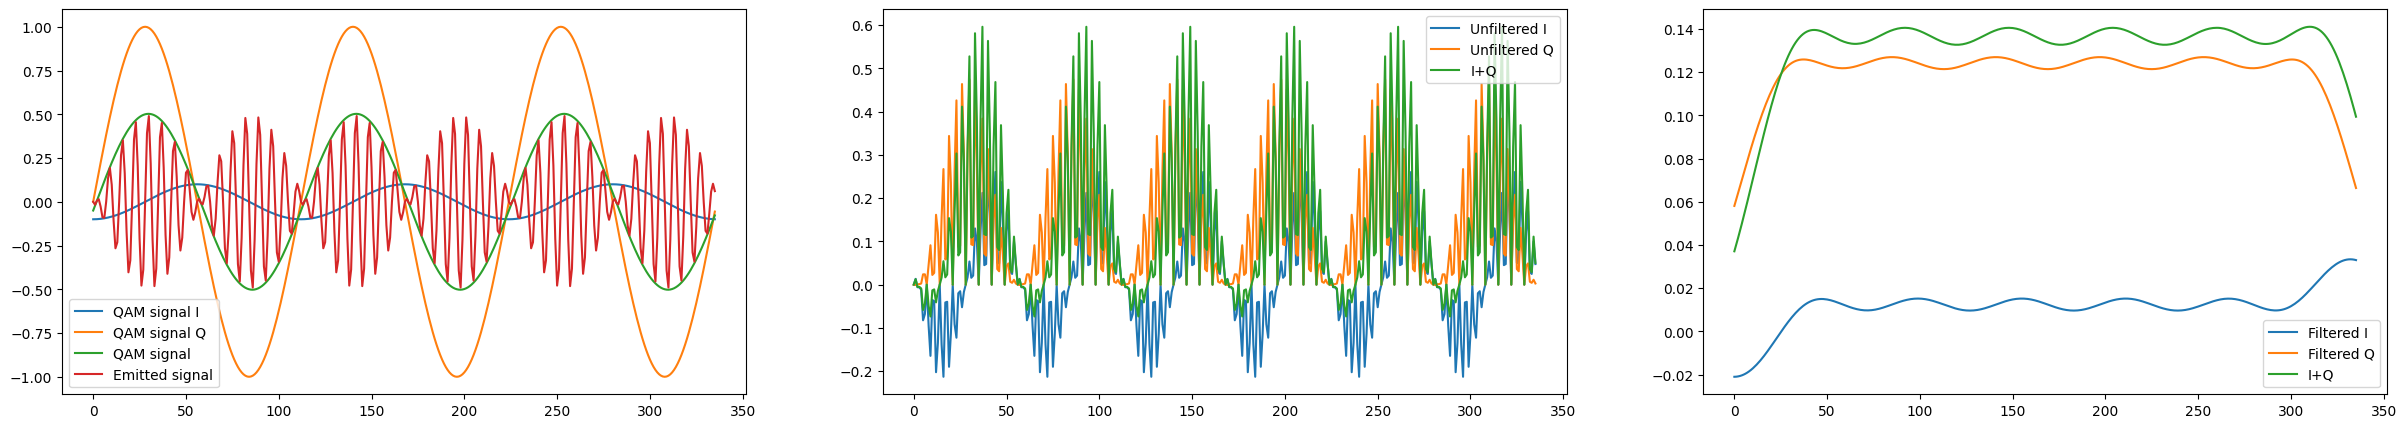

In [236]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(30,5))

ax[0].plot(qam_signal_I[0],label="QAM signal I")
ax[0].plot(qam_signal_Q[0],label="QAM signal Q")
ax[0].plot(qam_signal[0],label="QAM signal")
ax[0].plot(emitted_signal[0],label="Emitted signal")
#ax[0].plot(car[0],label="Carrier signal")
ax[1].plot(demod_s_nofil.real[0],label="Unfiltered I")
ax[1].plot(demod_s_nofil.imag[0],label="Unfiltered Q")
ax[1].plot(demod_s_nofil.real[0]+demod_s_nofil.imag[0],label="I+Q")
ax[2].plot(demod_s_fil.real[0],label="Filtered I")
ax[2].plot(demod_s_fil.imag[0],label="Filtered Q")
ax[2].plot(demod_s_fil.real[0]+demod_s_fil.imag[0],label="I+Q")
#ax[1].set_ylim([0,None])
#ax[2].set_ylim([0,None])

ax[0].legend()
ax[1].legend()
ax[2].legend()

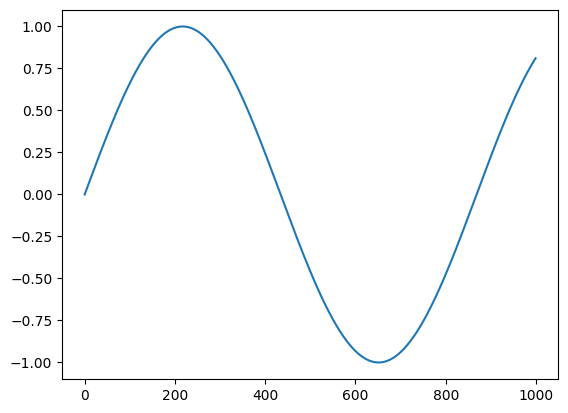

In [282]:
t=np.linspace(0,1,1000)
x=np.sin(2*np.pi*20*t)
x=np.sin(2*np.pi*(20%(2*np.pi))*t)
#print(x)
plt.plot(x)

4.783542904563622 11.548494156391085
[[-0.03125  0.     ]
 [ 0.03125  0.     ]]


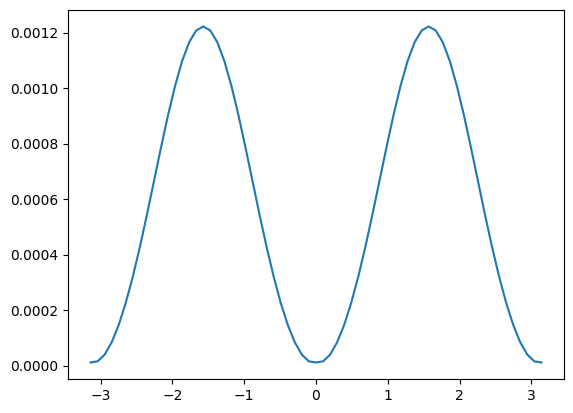

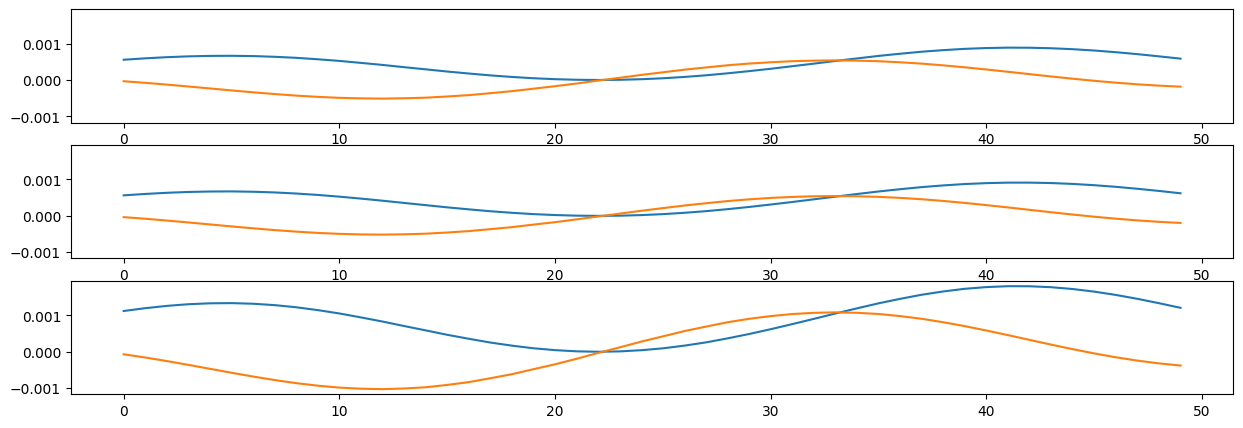

In [358]:

import rf
importlib.reload(rf)
sample_rate=9.1e6
channel_frequency=100e3
carrier_frequency=2.4e9

wavelength=c/carrier_frequency



theta=np.pi/8
x=wavelength*100*np.sin(theta)
y=wavelength*100*np.cos(theta)

print(x,y)
qam=rf.QAMSource(np.array([x,y]),
               signal_frequency=channel_frequency,
               sigma=0,
               IQ=(1.0,0.0),
                #h = signal.firwin(numtaps=151, cutoff=channel_frequency, fs=sample_rate)
              )
q=rf.CarrierSource(np.array([x,y]),
                   carrier_frequency,
                   qam,
                   h = signal.firwin(numtaps=41, cutoff=channel_frequency, fs=sample_rate)
                  )

d=rf.ULADetector(sampling_frequency=sample_rate,n_elements=2,spacing=wavelength/2)
print(d.all_receiver_pos())
d.add_source(q)
signal_matrix,raw_signal=d.get_signal_matrix(1.0000001,50/sample_rate) 

thetas,sds,steer=rf.beamformer(
    d.all_receiver_pos(),
    signal_matrix,
    carrier_frequency)
plt.plot(thetas,sds)

#signal_matrix[1]*=np.exp(-1j*np.pi)

fig,ax=plt.subplots(3,1,figsize=(15,5),sharey=True)
ax[0].plot(signal_matrix[0].real)
ax[0].plot(signal_matrix[0].imag)
ax[1].plot(signal_matrix[1].real)
ax[1].plot(signal_matrix[1].imag)
ax[2].plot(signal_matrix[0].real+signal_matrix[1].real)
ax[2].plot(signal_matrix[0].imag+signal_matrix[1].imag)

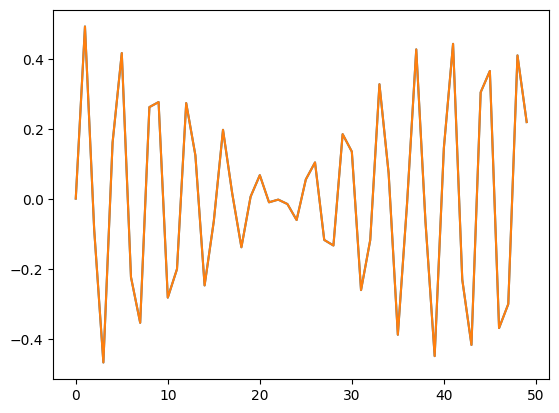

In [331]:
plt.plot(raw_signal[0][1])
plt.plot(raw_signal[0][0])

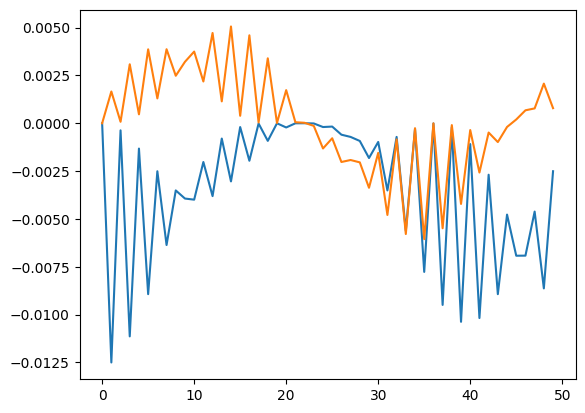

In [332]:
plt.plot(signal_matrix[1].real)
plt.plot(signal_matrix[1].imag)

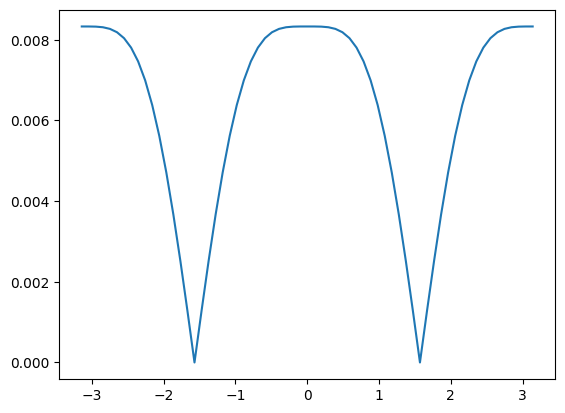

In [4]:



theta=0
d=Detector(1e6) # 1Mhz sampling
sin_source_frequency=12e3 # 10khz signal 
wavelength=c/sin_source_frequency

d.add_source(SinSource([
      wavelength*100000*np.cos(theta),
      wavelength*100000*np.sin(theta)],
      sin_source_frequency,0))
  
d.add_receiver(Receiver([wavelength/8,0]))
d.add_receiver(Receiver([-wavelength/8,0]))
d.re

(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)
(2, 200)


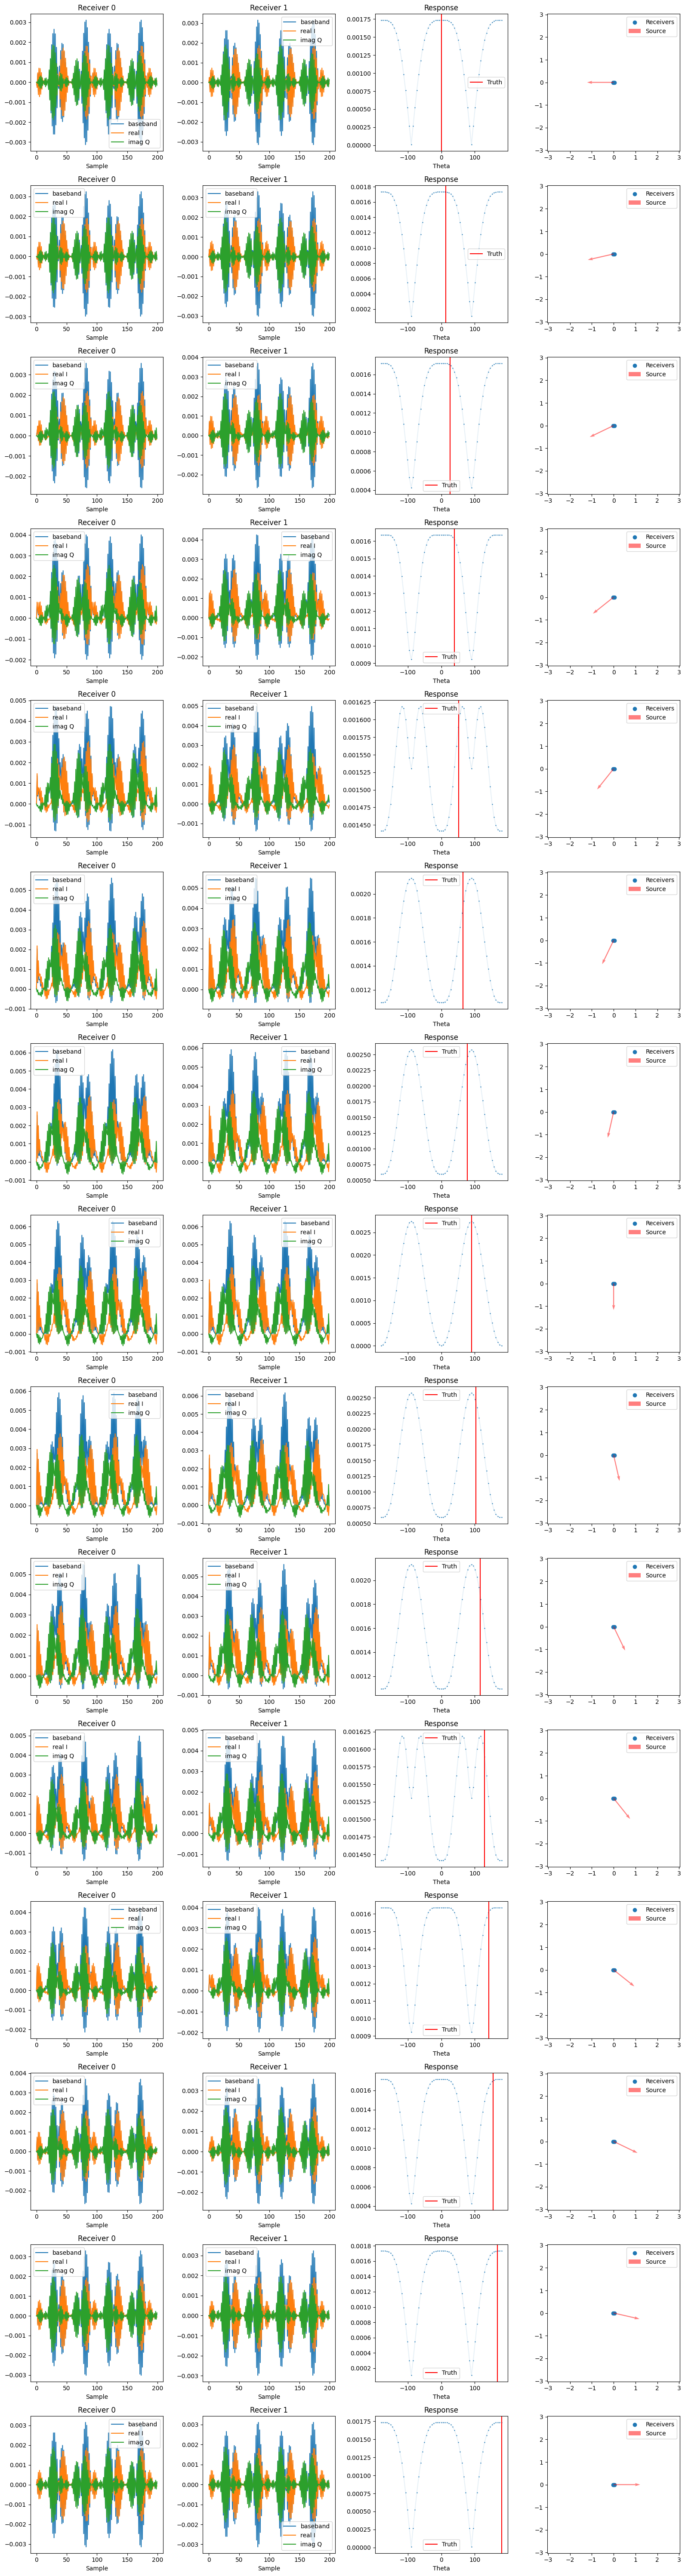

In [359]:
from rf import beamformer 

def plot_space(ax,d):
  #fig,ax=plt.subplots(1,1,figsize=(4,4))
  receiver_pos=d.all_receiver_pos()
  _max=receiver_pos.max()
  _min=receiver_pos.min()
  buffer=max(3,int((_max-_min)*0.1))
  _max+=buffer
  _min-=buffer

  center_mass=receiver_pos.mean(axis=0)

  source_vectors=[ (source.pos-center_mass)/np.linalg.norm(source.pos-center_mass) for source in d.sources ]

  ax.set_xlim([_min,_max])
  ax.set_ylim([_min,_max])

  ax.scatter(receiver_pos[:,0],receiver_pos[:,1],label="Receivers")
  for source_vector in source_vectors:
    ax.quiver(center_mass[0], center_mass[1], 
              -source_vector[0], -source_vector[1], scale=5, alpha=0.5,color='red',label="Source")
  ax.legend()


n=15
fig,axs=plt.subplots(n,4,figsize=(4*4,4*n))
sample_rate=9.1e6
channel_frequency=100e3
carrier_frequency=2.4e9

wavelength=c/carrier_frequency

for theta_idx,theta in enumerate(np.linspace(0,np.pi,n)):
  pos=np.array([
      wavelength*100*np.cos(theta),
      wavelength*100*np.sin(theta)])
    
  qam=rf.QAMSource(pos,
                   signal_frequency=channel_frequency,
                   sigma=0,
                   IQ=(1.0,1.0),
                    #h = signal.firwin(numtaps=151, cutoff=channel_frequency, fs=sample_rate)
                  )
  q=rf.CarrierSource(pos,
                   carrier_frequency,
                   qam,
                   #h = signal.firwin(numtaps=51, cutoff=channel_frequency, fs=sample_rate)
                  )

  d=rf.ULADetector(sampling_frequency=sample_rate,n_elements=2,spacing=wavelength/2)
  d.add_source(q)
  signal_matrix,_=d.get_signal_matrix(2.0,200.0/sample_rate) 
  n_receivers=d.n_receivers()

  print(signal_matrix.shape)
  beam_thetas,beam_sds,steer=beamformer(
      d.all_receiver_pos(),
      signal_matrix,
      carrier_frequency)


  for idx in range(signal_matrix.shape[0]):
    axs[theta_idx][idx].plot(signal_matrix[idx].real+signal_matrix[idx].imag,label='baseband')
    axs[theta_idx][idx].plot(signal_matrix[idx].real,label='real I')
    axs[theta_idx][idx].plot(signal_matrix[idx].imag,label='imag Q')
    axs[theta_idx][idx].legend()
    axs[theta_idx][idx].set_title("Receiver %d" % idx)
    axs[theta_idx][idx].set_xlabel("Sample")
  
  beam_degrees=360*beam_thetas/(np.pi*2)
  axs[theta_idx][n_receivers].plot(beam_degrees,beam_sds,alpha=0.1)
  axs[theta_idx][n_receivers].scatter(beam_degrees,beam_sds,s=0.5)
  axs[theta_idx][n_receivers].axvline(x=360*theta/(2*np.pi),label="Truth",color='red')
  axs[theta_idx][n_receivers].set_title("Response")
  axs[theta_idx][n_receivers].set_xlabel("Theta")
  axs[theta_idx][n_receivers].legend()

  plot_space(axs[theta_idx][n_receivers+1],d)
fig.tight_layout()